In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = {
    'cust_id': [1, 2, 3, 4, 5,6],
    'income':[15,16,17,7,5,3],
    'credit_score':[750,780,800,450,430,350],
    'status':['Y','Y','Y','N','N','N']
}
df = pd.DataFrame(data)
df.head()

,cust_id,income,credit_score,status
0,1,15,750,Y
1,2,16,780,Y
2,3,17,800,Y
3,4,7,450,N
4,5,5,430,N


In [4]:
a = np.array([2.5,750])
b = np.array([2.5,750])
# distance between a and b
distance = np.sqrt(np.sum((a - b) ** 2))


def compute_distance(a, b):
    print(f"Computing distance between {a} and {b}")
    return np.sqrt(np.sum((a - b) ** 2))

new_customer = np.array([2.0, 430])

df['distance'] = df.apply(lambda row: compute_distance(np.array([row['income'], row['credit_score']]), new_customer), axis=1)
df.head()



# to tell the 2 closest customers
closest_customers = df.nsmallest(2, 'distance')
status = closest_customers['status'].mode()
status


Computing distance between [ 15 750] and [  2. 430.]
Computing distance between [ 16 780] and [  2. 430.]
Computing distance between [ 17 800] and [  2. 430.]
Computing distance between [  7 450] and [  2. 430.]
Computing distance between [  5 430] and [  2. 430.]
Computing distance between [  3 350] and [  2. 430.]


0    N
Name: status, dtype: object

In [5]:
df.sort_values(by='distance', inplace=True)
df.head()   

,cust_id,income,credit_score,status,distance
4,5,5,430,N,3.000000
3,4,7,450,N,20.615528
5,6,3,350,N,80.006250
0,1,15,750,Y,320.263954
1,2,16,780,Y,350.279888


In [6]:
def compute_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def prediction(new_customer, df):
    df['distance'] = df.apply(lambda row: compute_distance(np.array([row['income'], row['credit_score']]), new_customer), axis=1)
    closest_customers = df.nsmallest(2, 'distance')
    status = closest_customers['status'].mode()
    return status


new_customer = np.array([2.0, 430])
prediction(new_customer, df)

0    N
Name: status, dtype: object

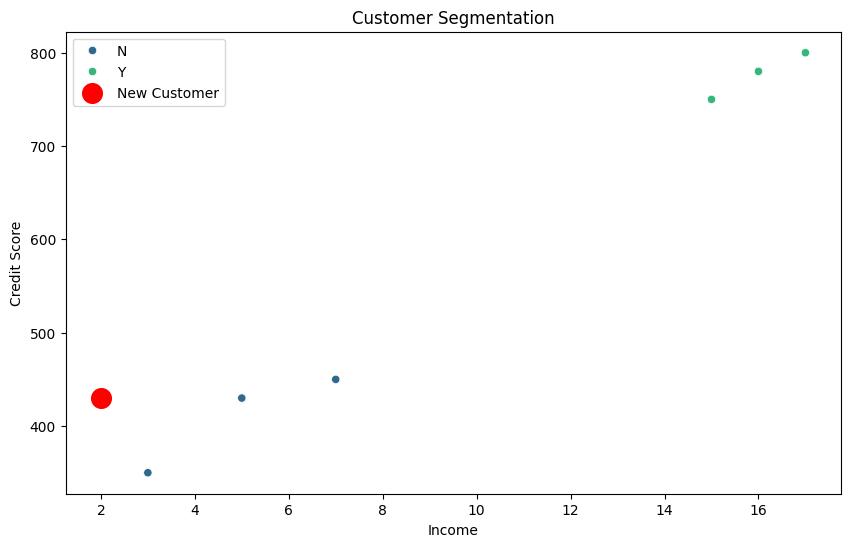

In [7]:
# lets vis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='credit_score', hue='status', palette='viridis')
plt.scatter(new_customer[0], new_customer[1], color='red', s=200, label='New Customer')
plt.title('Customer Segmentation')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.legend()
plt.show()

In [8]:
data = {
    'cust_id': [1, 2, 3, 4, 5,6],
    'income':[15,16,17,7,5,3],
    'credit_score':[750,780,800,450,430,350],
    '#active_loans':[2,1,0,3,4,5],
    'status':['Y','Y','Y','N','N','N']
}

df = pd.DataFrame(data)
df.head()



,cust_id,income,credit_score,#active_loans,status
0,1,15,750,2,Y
1,2,16,780,1,Y
2,3,17,800,0,Y
3,4,7,450,3,N
4,5,5,430,4,N


In [9]:
new_customer = np.array([2.0, 430, 4])
# Task 1 : Predict the probability of default for the new customer ( update your python function for compute distance and prediction

In [10]:
data = {
    'cust_id': [1, 2, 3, 4, 5,6],
    'income':[15,16,17,7,5,3],
    'credit_score':[750,780,800,450,430,350],
    '#active_loans':[2,1,0,3,4,5],
    '#closed_loans':[1,1,0,1,1,1],
    'status':['Y','Y','Y','N','N','N']
}

df = pd.DataFrame(data)
# total_loans
df['total_loans'] = df['#active_loans'] + df['#closed_loans']
# ratio of active to total loans
df['active_to_total_ratio'] = df['#active_loans'] / df['total_loans']
df.head()

,cust_id,income,credit_score,#active_loans,#closed_loans,status,total_loans,active_to_total_ratio
0,1,15,750,2,1,Y,3,0.666667
1,2,16,780,1,1,Y,2,0.500000
2,3,17,800,0,0,Y,0,NaN
3,4,7,450,3,1,N,4,0.750000
4,5,5,430,4,1,N,5,0.800000


In [11]:
# plotly 3d
import plotly.express as px

# new customer data
new_customer = np.array([2.0, 430, 4])

fig = px.scatter_3d(df, x='income', y='credit_score', z='#active_loans', color='status',
                    hover_data=['cust_id'])
fig.add_scatter3d(x=[new_customer[0]], y=[new_customer[1]], z=[new_customer[2]], mode='markers', marker=dict(size=5, color='red'))
fig.show()



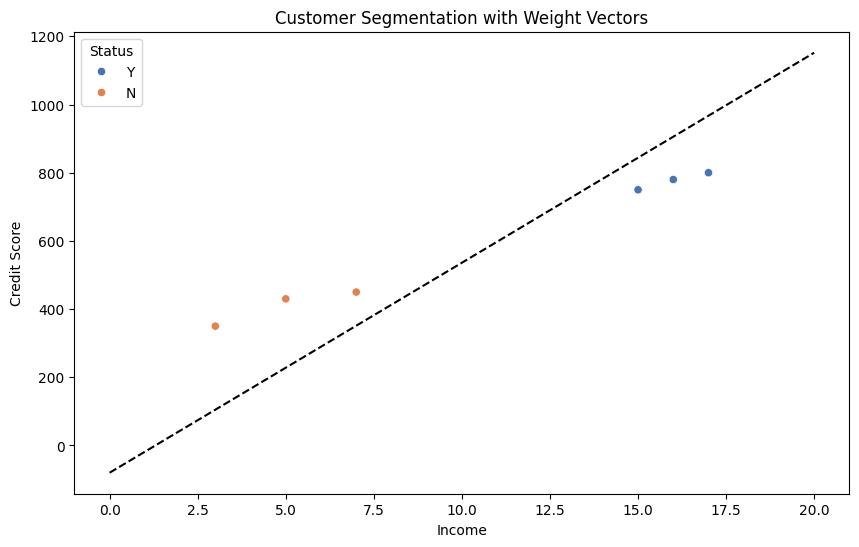

In [31]:
df_1 = df[['income', 'credit_score','status']]
df_1.head()

# weight vectors
w1,w2,w0 = -30.8,0.5,-40

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='credit_score', hue='status', palette='deep')
x = np.linspace(0, 20, 100)
y = (w0 - w1 * x) / w2
plt.plot(x, y, color='black', linestyle='--')
plt.title('Customer Segmentation with Weight Vectors')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.legend(title='Status')
plt.show()

In [ ]:
# decision boundary
def prediction(income, credit_score):
    x = income
    y = w1*x + w2x*credit_score + w0
    print(f"Computed value: {y}")
    if y > 0:
        return 0
    else:
        return 1

prediction(3, 450)


Computed value: 92.6


0